In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import time

import sys
sys.path.append('../MoitraRohatgi/')
sys.path.append('../')
import auditor_tools
import algorithms
import experiments
import examples
import our_experiments

# Synthetic data 
We load both datasets (2D and 4D) and then run each of the algorithms (other than the greedy exact ones that don't apply here).

In [2]:
X2, Y2, n2, X4, Y4, n4 = our_experiments.LoadSyntheticData()

#### 2D

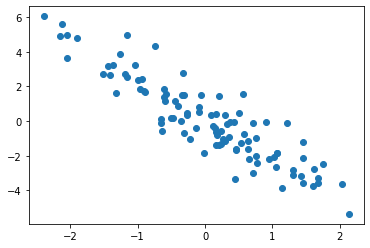

In [3]:
# plot the dataset, for intuition
plt.scatter(X2[:,0],Y2)

In [4]:
print("Moitra-Rohatgi (fractional stability):")
timer = time.time()
print("upper bound: " + str(algorithms.net_algorithm(X2,Y2,100)))
print("lower bound: " + str(algorithms.lp_algorithm(X2,Y2,[0],100)))
print("total time: " + str(time.time() - timer))

Moitra-Rohatgi (fractional stability):
Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-04
upper bound: 62.656931697685266
lower bound: 60.22962675747046
total time: 25.65052890777588


In [5]:
print("Spectral:")
timer = time.time()
print("lower bound: " + str(auditor_tools.spectral_certify(X2,Y2,intercept=False,i=0,verbose=True)))
print("total time: " + str(time.time() - timer))

Spectral:
lower bound: 19.543225083505405
total time: 0.015471696853637695


In [6]:
print("Integer Programming (1 min cutoff):")
timer = time.time()

# get fractional bound, also fractional weights to warm-start integral solve
Xflipped = copy.deepcopy(np.flip(X2,axis=1))
bound_frac, val_frac, w, model = auditor_tools.solve_regression_fractional(Xflipped,Y2, 
                                intercept=False,time_limit=30, verbose=True)
ws = []
for i in range(len(Y2)):
    if model.getVars()[i].X > 0.8:
        ws.append(1)
    else:
        ws.append(0)

# do the integral solve
bound, val, w, model = auditor_tools.solve_regression_integral(Xflipped,Y2,
                        intercept=False,time_limit=30,warm_start=ws, warm_start_ub= model.ObjBound,verbose=True)

print("upper bound: " + str((len(Y2) - val)))
print("lower bound: " + str((len(Y2) - bound)))
print("total time: " + str(time.time() - timer))

Integer Programming (1 min cutoff):
set residual constraints
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 30
start solving
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 200 rows, 101 columns and 200 nonzeros
Model fingerprint: 0x0b438095
Model has 2 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-02, 2e+00]
  QLMatrix range   [5e-04, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 200 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Found heuristic solution: objective -0.0000000
Presolve removed 200 rows and 0 columns
Presolve time: 0.00s
Presolved: 402 rows, 202 columns, 1200 nonzeros
Presolved model has 100 bilinear constraint(s)
Variable types: 202 continuous, 0 integer (0 binary)

Root relax

In [7]:
print("ZAMinfluence (BGM21):")
timer = time.time()
print("upper bound: " + str(len(Y2)-auditor_tools.ZAMinfluence_upper_bound(Xflipped,Y2)[0]))
print("total time: " + str(time.time() - timer))

ZAMinfluence (BGM21):
upper bound: 100
total time: 0.03093099594116211


In [8]:
print("KZC21:")
timer = time.time()
print("upper bound: " + str(len(Y2)-auditor_tools.ZAMinfluence_resolving(Xflipped,Y2)[0]))
print("total time: " + str(time.time() - timer))

KZC21:
upper bound: 63
total time: 0.10919809341430664


#### 4D

Here, we don't try to run the Moitra-Rohatgi lower bound because it is too slow in higher dimensions

In [9]:
print("Moitra-Rohatgi (fractional stability):")
timer = time.time()
print("upper bound: " + str(algorithms.net_algorithm(X4,Y4,1000)))
print("lower bound: NONE -- MR LP algorithm times out in 4 dimensions")
print("lower bound: " + str(algorithms.lp_algorithm(X4,Y4,[0],5)))
print("total time: " + str(time.time() - timer))

Moitra-Rohatgi (fractional stability):
upper bound: 451.8334680019641
lower bound: NONE -- MR LP algorithm times out in 4 dimensions
lower bound: 0.0
total time: 40.39258599281311


In [10]:
print("Spectral:")
timer = time.time()
print("lower bound: " + str(auditor_tools.spectral_certify(X4,Y4,i=3,intercept=False,verbose=True)))
print("total time: " + str(time.time() - timer))

Spectral:
lower bound: 101.74449656290035
total time: 0.10803914070129395


In [11]:
print("Integer Programming (1 min cutoff):")

timer = time.time()

Xflipped = copy.deepcopy(np.flip(X4,axis=1))


# get fractional bound, also fractional weights to warm-start integral solve
bound_frac, val_frac, w, model = auditor_tools.solve_regression_fractional(Xflipped,Y4, 
                                intercept=False,time_limit=30,verbose=True)
ws = []
for i in range(len(Y4)):
    if model.getVars()[i].X > 0.95:
        ws.append(1)
    else:
        ws.append(0)

# do the integral solve
bound, val, w, model = auditor_tools.solve_regression_integral(Xflipped,Y4,
                        intercept=False,time_limit=30,warm_start=ws, warm_start_ub= model.ObjBound,verbose=True)


print("upper bound: " + str((len(Y4) - val)))
print("lower bound: " + str((len(Y4) - bound)))
print("total time: " + str(time.time() - timer))

Integer Programming (1 min cutoff):
set residual constraints
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 30
start solving
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2000 rows, 1004 columns and 2000 nonzeros
Model fingerprint: 0xa4a90cdc
Model has 5 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-07, 2e+01]
  QLMatrix range   [3e-04, 3e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 2000 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Found heuristic solution: objective -0.0000000
Presolve removed 2000 rows and 0 columns
Presolve time: 0.02s
Presolved: 16005 rows, 5005 columns, 57000 nonzeros
Presolved model has 4000 bilinear constraint(s)
Variable types: 5005 continuous, 0 integer (0 binary)


In [12]:
print("ZAMinfluence (BGM21):")
timer = time.time()
print("upper bound: " + str(len(Y4)-auditor_tools.ZAMinfluence_upper_bound(Xflipped,Y4)[0]))
print("total time: " + str(time.time() - timer))

ZAMinfluence (BGM21):
upper bound: 922
total time: 1.8792369365692139


In [13]:
print("KZC21:")
timer = time.time()
print("upper bound: " + str(len(Y4)-auditor_tools.ZAMinfluence_resolving(Xflipped,Y4)[0]))
print("total time: " + str(time.time() - timer))

KZC21:
upper bound: 409
total time: 6.888159990310669
